# Nuages de mots

## Imports et stopwords

In [2]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1945

In [4]:
# Lister les Fichiers
data_path = "../data/camille_Crise_economique/"
files = os.listdir(data_path)

In [7]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for myFile in files:
    with open(data_path+myFile, 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [8]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

500

In [9]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'a*’ CW\'- tm p ^ •‘•" \' ; “•■ ’• ! ‘ . \'-■)#? ’ *>. •/\' •\' \' : ‘ \'•‘‘‘■■\'.H ; 5j ;■\'* y i(\' \' ,v ‘ •: : \' \'- ’ ■ \' •’■”•\' \'"’’ ■- ■ • ^^■1 " ;“ *\' » s.iïiFW V . ,tf \'^ -1 —’ \'—" •■ \'• ■. C-"r^»yWWïiS”.'

In [12]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, 'crise.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [14]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, 'crise.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'a*’ CW\'- tm p ^ •‘•" \' ; “•■ ’• ! ‘ . \'-■)#? ’ *>. •/\' •\' \' : ‘ \'•‘‘‘■■\'.H ; 5j ;■\'* y i(\' \' ,v ‘ •: : \' \'- ’ ■ \' •’■”•\' \'"’’ ■- ■ • ^^■1 " ;“ *\' » s.iïiFW V . ,tf \'^ -1 —’ \'—" •■ \'• ■. C-"r^»yWWïiS”. ■ - \'rfytjfRtfiyprfç!Kur7*vn?, 16 PAGES - 30 C mes }? ■ \\ <En Belgique et Allemagne occupée) jA l l’Etranger t 3S Centimes •/M JUIN 1929; Edit. **** * * * * à 14 b. 1* 4 Editions : ‘îï Mït ” * Edit, de Notl .;;■ ABONNEMENTS ! Agglomération bruxelloise .« .. .. ( Par mon. 7.50 [;■/>\', “ •• \' ., .. I'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [17]:
def clean_text(folder=None):
    if folder is None:
        input_path = "crise.txt"
        output_path = "crise_clean.txt"
    else:
        input_path = f"{folder}/crise.txt"
        output_path = f"{folder}/crise_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [18]:
clean_text(folder=temp_path)

'Output has been written in ../data/tmp/crise_clean.txt!'

In [19]:
# Vérifier le résultat
with open(os.path.join(temp_path, 'crise_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'IÏIFW YWWÏIS RFYTJFRTFIYPRFÇ PAGES BELGIQUE ALLEMAGNE OCCUPÉE ETRANGER CENTIMES JUIN EDIT EDITIONS MÏT EDIT NOTL ABONNEMENTS AGGLOMÉRATION BRUXELLOISE IROWMON PTOVINCA SIX MOII NENAEE OTNM HFAILA UNAN BELGE ETRANGER PRIX SUIVANT CONVENTION PORTA RÉDACTIONS TÉIJÊ HONES IMPRIMÉES COMPTE CHÈQUE POSTAUX RÉDACTION PLACE LOUVAIN ADMINISTRATION PLACE LÇUVAIO ANNONCE AGENCE ROAAEL ROYALE CHAQUE JOUR PAGES SALLE DÉPÊCHES RUE ROYALE BRUXELLES BUREAUX FILA SPÉCIAUX PARIS PLACE BOURSE LONDRES FLEEF STREET T'

## Nuage de mots

### Afficher les termes les plus fréquents


In [20]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('GOUVERNEMENT', 6510), ('PAYS', 5180), ('MINISTRE', 4769), ('POLITIQUE', 4229), ('ÉCONOMIQUE', 3842), ('CRISE', 3731), ('PRÉSIDENT', 3712), ('PRIX', 3429), ('BELGIQUE', 3327), ('BRUXELLES', 3172)]


### Créer, stocker et afficher le nuage de mots

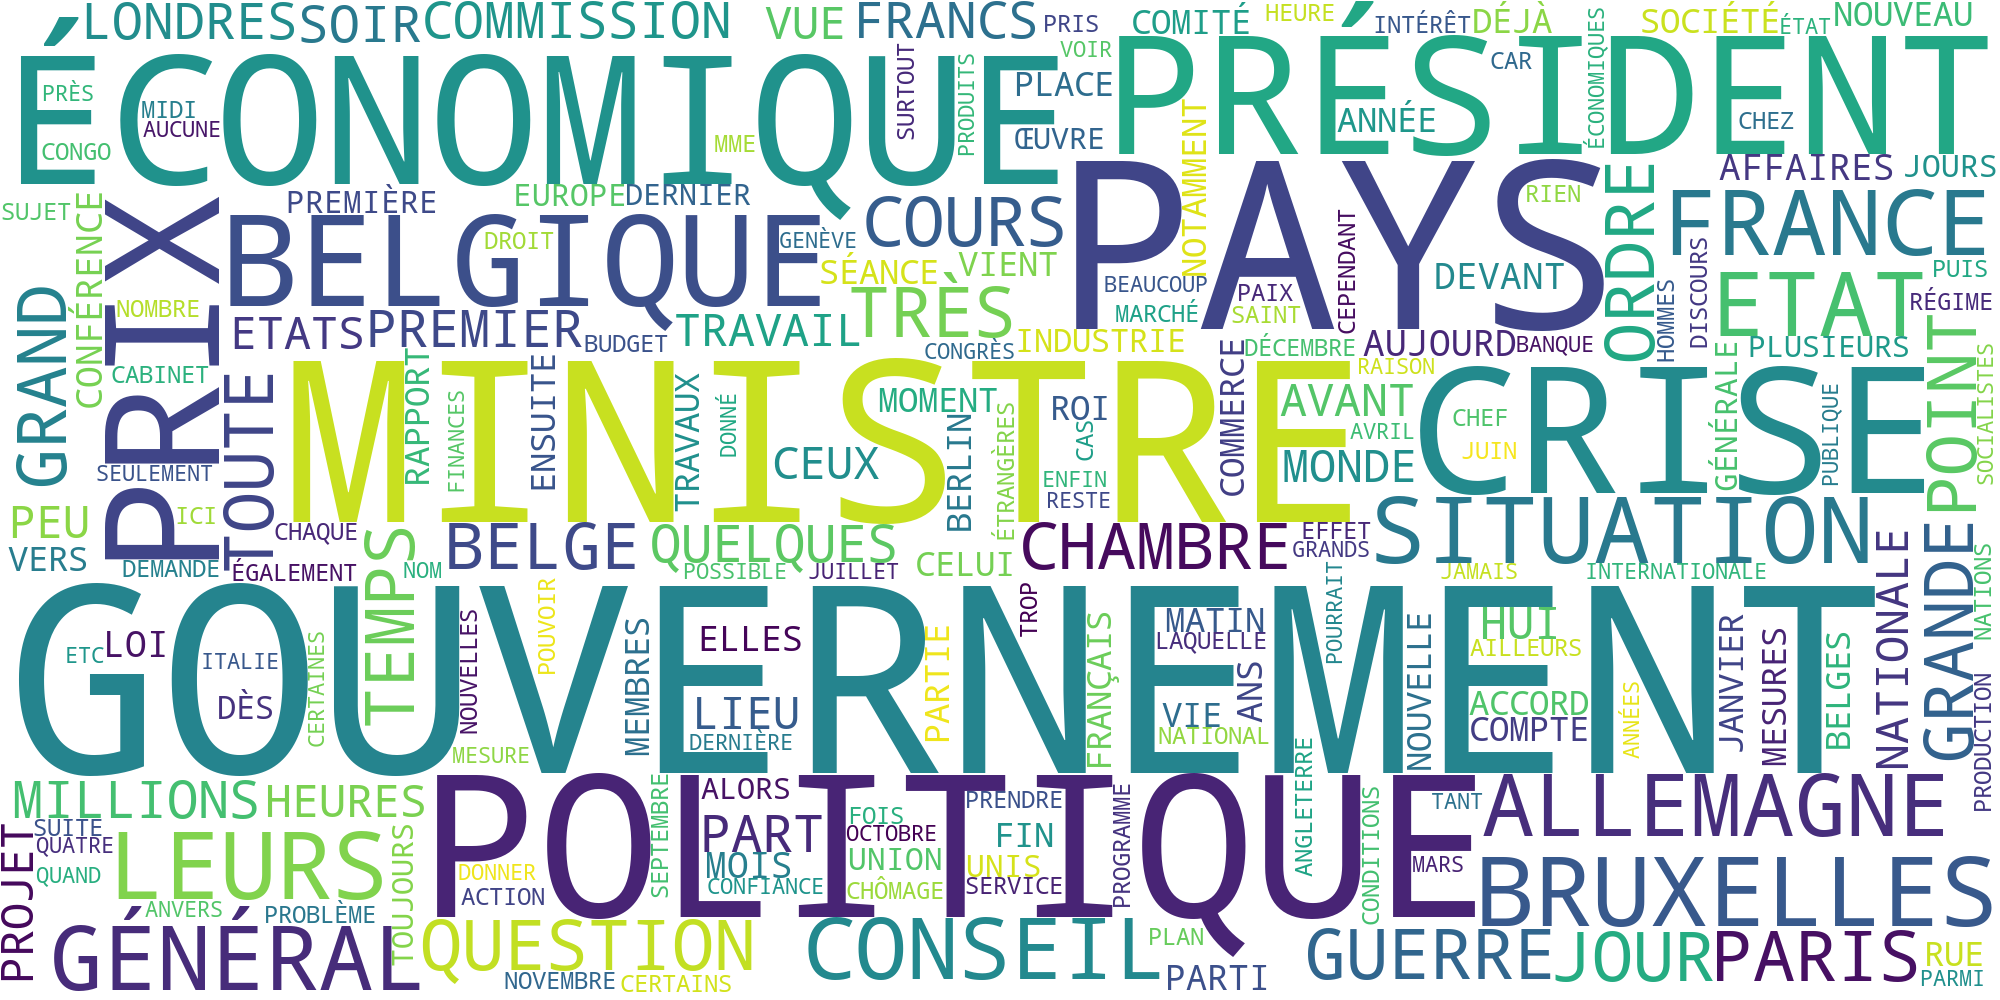

In [22]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, "crise.png"))
Image(filename=os.path.join(temp_path, "crise.png"))